<a href="https://colab.research.google.com/github/Harsh-htx/AI-project--Poker-Game/blob/main/notebookc45bb38e6a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", color_codes=True)

In [2]:
df = pd.read_csv("/one_dollar_spin_and_go.csv")

In [3]:
mylogin = 'fa538846'

In [4]:
# Wins and defeats (proportion of games)
wd = df.pivot_table(index='tourn_id',columns='name',values='balance',aggfunc='sum')[mylogin]
wd = wd.value_counts().rename(index={-500:'defeat',1000:'win'})
pd.DataFrame(wd/wd.sum())

,fa538846
defeat,0.658188
win,0.341812


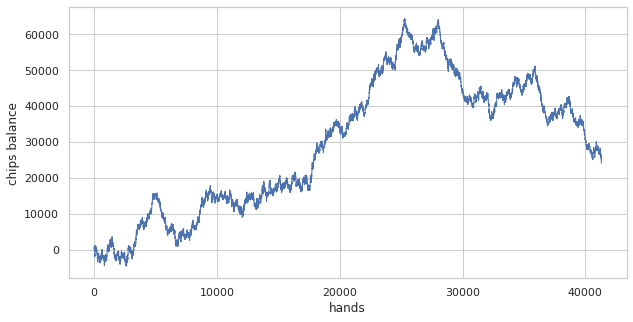

In [5]:
# Chips performance per hand
(
    df.query("name == @mylogin")['balance'].reset_index(drop=True)
    .cumsum()
    .plot(kind='line',figsize=(10,5),xlabel='hands',ylabel='chips balance',lw=1)
);

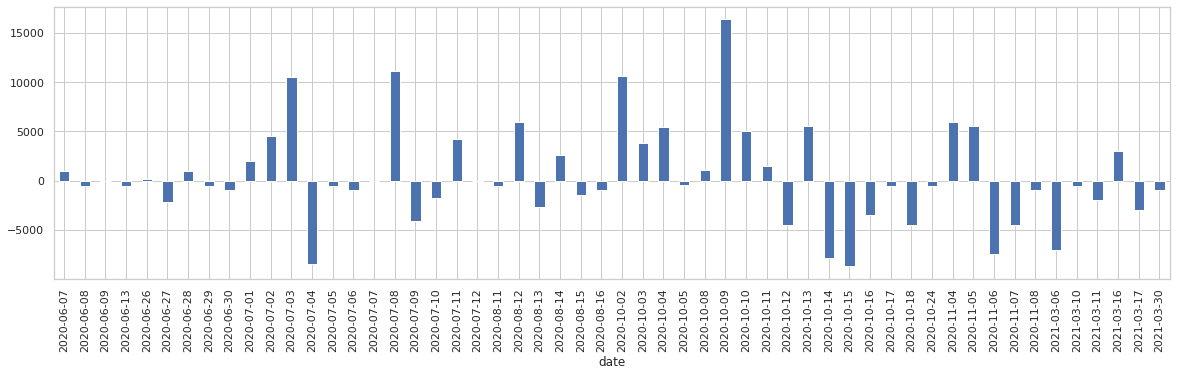

In [6]:
# Chips performance per date
(
    df
    .pivot_table(index='date',columns='name',values='balance',aggfunc='sum')[mylogin]
    .plot(kind='bar',figsize=(20,5))
);

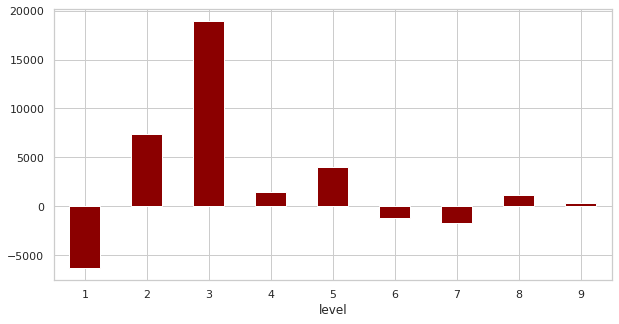

In [7]:
# Chips performance per blinds levels
(
    df
    .pivot_table(index='level',columns='name',values='balance',aggfunc='sum')[mylogin]
    .plot(kind='bar',figsize=(10,5),color='darkred',rot=0)
);

In [8]:
def clean(x):
    return int(x[0:2].replace(':',''))
df['hour'] = df['time'].apply(clean)
df['day'] = pd.to_datetime(df['date']).dt.dayofweek

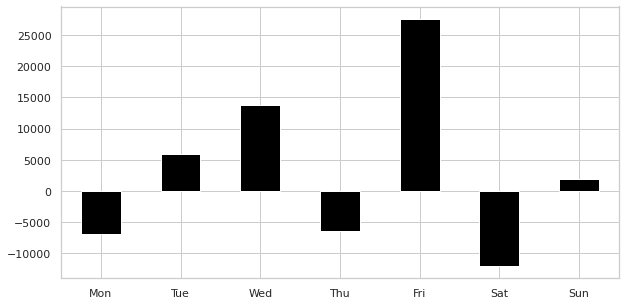

In [9]:
# Chips performance per weekday
(
    df
    .pivot_table(index='day',columns='name',values='balance',aggfunc='sum')[mylogin]
    .plot(kind='bar',figsize=(10,5),color='black',xlabel='')
    .set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],rotation=0)
);

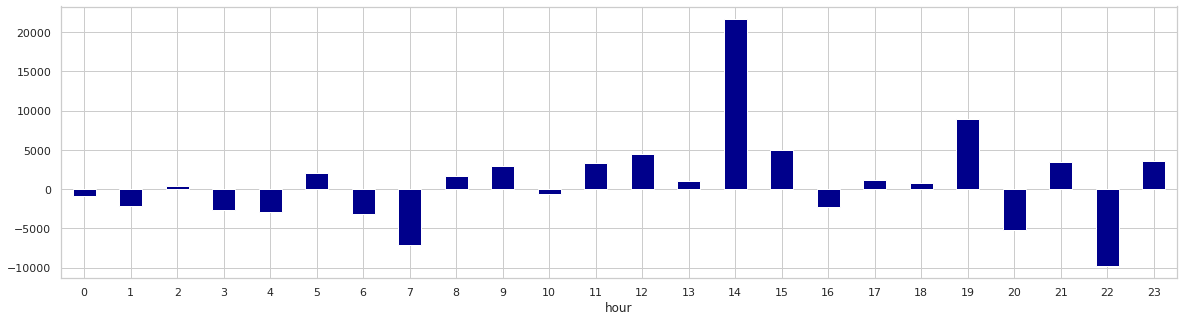

In [10]:
# Chips performance per hour of the day
(
    df
    .pivot_table(index='hour',columns='name',values='balance',aggfunc='sum')[mylogin]
    .plot(kind='bar',figsize=(20,5),color='darkblue',rot=0)
);

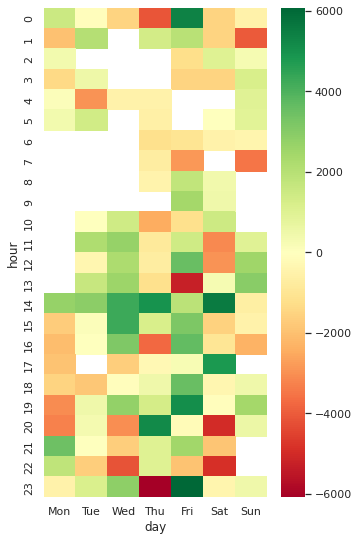

In [11]:
# Chips performance per weekday and hour of the day
plt.subplots(figsize=(5,9))
sns.heatmap(
    df
    .query("name == @mylogin")
    .pivot_table(index='hour',columns='day',values='balance',aggfunc='sum')
    .rename({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}, axis='columns'),
    cmap='RdYlGn'
);

In [12]:
# Chips performance per cards combinations and blinds levels
def cardslevel(x):
    for asc,bw in zip([False,True],['BEST','WORST']):
        dfcards = (
            df
            .query("level == @x")
            .pivot_table(index='combination',columns='name',values='balance',aggfunc='sum')[mylogin]
            .sort_values(ascending=asc)[0:5]
            .dropna()
        )
        print('-'*36,f'\n {bw} FIVE HANDS\n','-'*36,sep='')
        for i,j in zip(dfcards.index,dfcards.values):
            print(i,f'%{35-len(i)}s' % str(int(j)))
    if asc: print('-'*36)
for i in range(1,7):
    print(f'\n\nLEVEL {i}:')
    cardslevel(i)



LEVEL 1:
------------------------------------
 BEST FIVE HANDS
------------------------------------
a pair of Kings                10728
a pair of Aces                  9871
a flush, Ace high               8483
a straight, Ten to Ace          5658
a flush, King high              5566
------------------------------------
 WORST FIVE HANDS
------------------------------------
high card Ace                 -21072
high card King                 -7641
a pair of Threes               -5376
a pair of Sevens               -5055
a pair of Fives                -4463
------------------------------------


LEVEL 2:
------------------------------------
 BEST FIVE HANDS
------------------------------------
a flush, Ace high               8503
a pair of Aces                  7178
a flush, King high              6879
a straight, Nine to King        4928
a straight, Ten to Ace          4175
------------------------------------
 WORST FIVE HANDS
------------------------------------
high card Ace       